# Análisis de datos del titanic

Descarga los datos de este proyecto en el siguiente enlace:

https://www.kaggle.com/c/titanic

## 1. Cargando datos

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# lectura de datos en Python
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Explorando datos

In [35]:
# ¿Qué columnas tienen los datos?
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
# ¿Qué tamaño tienen los datos? -filas, columnas-
train.shape

(891, 12)

In [37]:
# ¿Hay valores nulos en los datos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
# ¿Cómo se distribuyen las variables numéricas? Estadistica Básica
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
# ¿Cómo se comportan las variables categóricas?
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gaskell, Mr. Alfred",male,CA. 2343,G6,S
freq,1,577,7,4,644


## 2.1 EDA: Estudio de variable target

In [40]:
#La función Pandas dataframe.groupby() se utiliza para dividir los datos en grupos basados en algunos criterios. 

In [41]:
# La variable target es 'Survived'
# 0 = No, 1 = Si

train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [42]:
# target vs sex
train.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


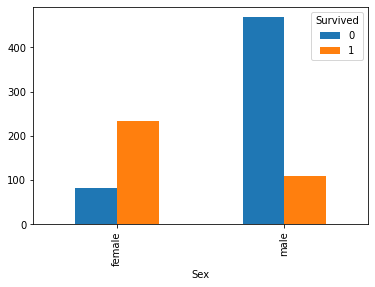

In [43]:
# Graficámos la información
grouped_sex = train.groupby(['Survived','Sex']).count()['PassengerId']
print(grouped_sex)

(grouped_sex.unstack(level=0).plot.bar())
plt.show()

In [44]:
# unstack(level=0) apila el dataframe horizontalmente
grouped_sex.unstack(level=0)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [45]:
# tarea hacer para otras variables

AxesSubplot(0.125,0.125;0.775x0.755)


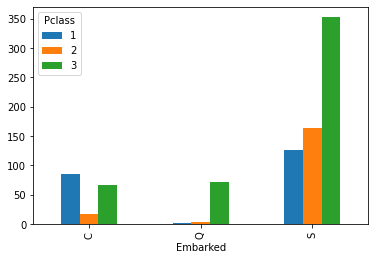

In [46]:
# embarked vs pclass
# Embarked -> C = Cherbourg, Q = Queenstown, S = Southampton
# Pclass -> Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd

print(train.groupby(['Pclass', 'Embarked'])
        .count()['PassengerId']
        .unstack(level=0)
        .plot.bar())

## 3.Procesamiento de datos

Empezamos seleccionando las variables que queremos trabajar que serían:

- Survived
- Sex
- Age
- Pclass

In [47]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


Estudiamos los datos nulos

In [48]:
# Identifiva que tipo de dato contiene cada columna.

train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Tenemos que mejorar

- Datos faltantes en Age train['Age'].isna()
- La variable Sex aparece como object y queremos int o float para algoritmos

In [49]:
# mirar como se distribuyen los nulos en edad
# La función Pandas dataframe.isna() se utiliza para detectar los valores perdidos. Devuelve True si los valores son NA.
(train[train['Age'].isna()]
      .groupby(['Sex', 'Pclass'])
      .count()['PassengerId']
      .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [50]:
# SibSP = # Número de hermanos / cónyuges a bordo del Titanic
# Parch = # de padres / hijos a bordo del Titanic
(train[train['Age'].isna()]
      .groupby(['SibSp', 'Parch'])
      .count()['PassengerId']
      .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


De arriba se puede concluir que era gente que viajaba mayormente sola y la mayoría eran de 3era clase.

Esto nos da la idea de que se puede crear una variable que indique si la persona viajaba sola o acompañada.

La crearemos más adelante

In [51]:
# calcular mediana de Age para imputar esa variable en los datos faltantes
train['Age'].median()

28.0

Esto ya es a juicio del analista, aquí consideramos que 28 años correspondia a un hombre soltero que viaja solo por lo que imputamos esa variable.<br> La imputación de un valor es para que el modelo tenga algo con que entrenar, pero tambien puede llevar a sesgoz en el análisis por lo que hay que tener mucho cuidado.

In [52]:
# imputar valor para rellenar nulos
train['Age'] = train['Age'].fillna(28.0)
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Ya no tenemos nulos. Falta resolver lo de pasar Sex a int

In [53]:
# map para label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

Ahora tenemos la tabla preprocesada lista

In [54]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


## 3.1 Crear nuevas variables

In [55]:
# crear nueva variable tipo flag "solo"
# Variable FlagSolo: 1 = se cumple la condición, 0 = no se cumple
train['FlagSolo'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


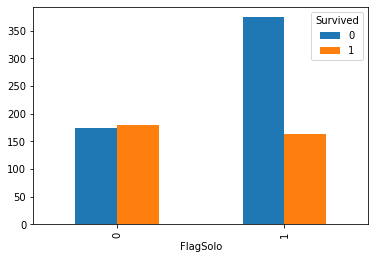

In [56]:
# Grafica 
grouped_flag = train.groupby(['Survived','FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

In [57]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


Estos ya serían los datos con los que vamos a hacer modelos

In [58]:
# variable dependiente
Y_train = train['Survived']

# preprocesamiento de variables independientes
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

print(Y_train.shape, X_train.shape)


(891,) (891, 4)


## 4. Modelos

Sin entrar en mucho detalle. Vamos a escoger dos modelos de prueba.

- regresión logistica
- arboles de decisión

In [59]:
# entrenando modelo regresión logistica
from sklearn.linear_model import LogisticRegression

# crea una variable y asignele una instacia del objeto LogisticRegression()
logreg = LogisticRegression()
# ajusta los datos de entrenamiento. Para aplicaciones de aprendizaje supervisado, acepta dos argumentos: los datos X y las etiquetas y.
logreg.fit(X_train, Y_train) 

LogisticRegression()

In [60]:
# entrenando modelo arboles de decisión
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

## 5. Evaluación

Aquí vamos a hacer una matriz de confusión y evaluar que tan bueno es cada modelo.<br> En una matriz de confución vamos a tener los valores predichos y los valores reales, en nuestro caso es la columna de si sobrevivió o no y los valores que dice el modelo que va a dar. Es decir, vamos a comprar lo que paso en realidad con lo que nosotros hemos predicho.

In [62]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
  disp = plot_confusion_matrix(modelo, X_train, Y_train,
                        cmap=plt.cm.Blues, values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

accuracy:  0.79


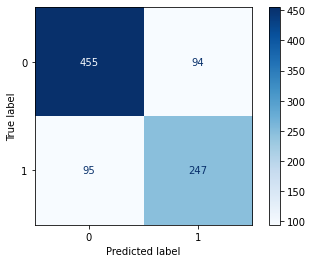

In [63]:
# Aplica para regresión logística
conf_mat_acc(logreg)

La presición fue de 79% y sale de la suma del 455 + 247 entre la suma de todos los valores del cuadro. Las esquinas 95 y 94 son los errores. El 455 y el 247 son lo datos acertados por el modelo para 0 y 1.

accuracy:  0.89


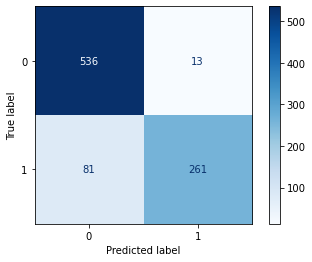

In [64]:
# Aplica para el modelo de decisión
conf_mat_acc(decision_tree)

Acá tenemos una mejor precisión.

## 5.1 Evaluación sobre el test set

Antes hicimos la matriz de confusión sobre el train set. Esto no es del todo correcto porque estamos utilizando como validación los datos que usamos de entrenamiento. Por lo tanto, la estimación del error sería sesgada y tendría poca capacidad de generalización a casos que no haya "visto" el modelo.

Por eso necesitamos utilizar el test set. Sin embargo, Kaggle no nos regresa el valor real del test set, para verificarlo tenemos que enviar nuestros resultados y mirar el score que pone kaggle esto lo veremos más adelante

In [65]:
# ahora hay que preparar el test set para evaluación
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [66]:
# preprocesando test set

# hacer map a Sex
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# rellenar Age
test['Age'] = test['Age'].fillna(28.0)

# Crear FlagSolo
test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [67]:
print(test.info())
test[features].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB
None


,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [68]:
# crear test set 
X_test = test[features]

print(X_test.shape)

(418, 4)


In [69]:
# prediccion de Survived en test set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


Nota: Estas predicciones deberían ser ahora comparadas con el valor real para obtener una mejor estimación del error de predicción sobre el test set y poder escoger un modelo.

Sin embargo, como es una competicion de Kaggle este valor solo lo conoce la plataforma.

Vamos a exportar estos CSV y luego subirlos para ver cual tiene mejor rendimiento.

## 6. Predicción

In [70]:
# prediciendo sobre el test set
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [ ]:
# para descargar en ordenador
def download_output(y_pred, name):
  output = pd.DataFrame({'PassengerId': test.PassengerId, 
                         'Survived': y_pred})
  output.to_csv(name, index=False)

In [ ]:
download_output(Y_pred_log, 'rafa_pred_log.csv')
download_output(Y_pred_tree, 'rafa_pred_tree.csv')

Luego de hacer el envio a kaggle:

Resultados de kaggle:
- árboles de decisión - > 0.73684
- regresión logística -> 0.75358<br>
    
Con lo que muestra que en el test_set hay un mejor valor para accuracy que con train set.

Por esta razón, nos quedaríamos con el modelo de regresión logística. Porque generaliza mejor las predicciones para datos con los que no se ha entrenado el modelo.

## Conclusión

En el análisis exploratorio vimos como se comportaba la variable 'Survival', en donde determinamos como variables explicativasa la edad y el género.
Después creamos una variable que contenia la información de los pasajeros que viajaban solos, ya que estos tenian una tasa diferente de supervivencia.
Probamos dos modelos: regresión logística y árboles de decisión.
Finalizamos calculando el error utilizando el test_set y no el trai_set.